###### go with the video for more information 
###### https://www.youtube.com/watch?v=9wmImImmgcI&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=11

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6251,6252,15614520,Smith,682,France,Female,37,8,148580.12,1,1,0,35179.18,0
203,204,15727868,Onuora,711,France,Female,38,2,129022.06,2,1,1,14374.86,1
8660,8661,15790594,Bednall,535,France,Female,27,6,0.00,2,0,1,49775.58,0
9752,9753,15781530,Hsieh,690,France,Male,21,8,0.00,2,1,1,155782.89,0
4748,4749,15759067,Bromby,537,Germany,Female,37,7,158411.95,4,1,1,117690.58,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(columns =['RowNumber','CustomerId','Surname'], inplace=True)

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df=pd.get_dummies(df,columns =['Geography','Gender'],drop_first =True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
X =df.drop(columns =['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_train.shape

(8000, 11)

In [16]:
y_train.shape

(8000,)

In [17]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_scaled =Scaler.fit_transform(X_train)
X_test_scaled =Scaler.fit_transform(X_test)

In [18]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()

model.add(Dense(11,activation ='relu',input_dim =11))
model.add(Dense(11,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
history = model.fit(X_train_scaled,y_train,epochs=250,validation_split=0.2)

Epoch 1/250
200/200 [==============================] - 1s 2ms/step - loss: 0.5897 - accuracy: 0.7108 - val_loss: 0.4930 - val_accuracy: 0.7975
Epoch 2/250
200/200 [==============================] - 0s 940us/step - loss: 0.4620 - accuracy: 0.8011 - val_loss: 0.4384 - val_accuracy: 0.8025
Epoch 3/250
200/200 [==============================] - 0s 975us/step - loss: 0.4211 - accuracy: 0.8172 - val_loss: 0.4112 - val_accuracy: 0.8213
Epoch 4/250
200/200 [==============================] - 0s 925us/step - loss: 0.4017 - accuracy: 0.8303 - val_loss: 0.3947 - val_accuracy: 0.8319
Epoch 5/250
200/200 [==============================] - 0s 910us/step - loss: 0.3883 - accuracy: 0.8403 - val_loss: 0.3817 - val_accuracy: 0.8413
Epoch 6/250
200/200 [==============================] - 0s 975us/step - loss: 0.3776 - accuracy: 0.8459 - val_loss: 0.3714 - val_accuracy: 0.8506
Epoch 7/250
200/200 [==============================] - 0s 955us/step - loss: 0.3688 - accuracy: 0.8511 - val_loss: 0.3640 - val_accu

Epoch 58/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8662 - val_loss: 0.3474 - val_accuracy: 0.8494
Epoch 59/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8678 - val_loss: 0.3467 - val_accuracy: 0.8456
Epoch 60/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8691 - val_loss: 0.3469 - val_accuracy: 0.8475
Epoch 61/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8683 - val_loss: 0.3459 - val_accuracy: 0.8481
Epoch 62/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8686 - val_loss: 0.3464 - val_accuracy: 0.8506
Epoch 63/250
200/200 [==============================] - 0s 950us/step - loss: 0.3239 - accuracy: 0.8680 - val_loss: 0.3472 - val_accuracy: 0.8487
Epoch 64/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8677 - val_loss: 0.3472 - val_accurac

Epoch 115/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8678 - val_loss: 0.3527 - val_accuracy: 0.8537
Epoch 116/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8683 - val_loss: 0.3523 - val_accuracy: 0.8481
Epoch 117/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8692 - val_loss: 0.3565 - val_accuracy: 0.8537
Epoch 118/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8680 - val_loss: 0.3517 - val_accuracy: 0.8512
Epoch 119/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8678 - val_loss: 0.3516 - val_accuracy: 0.8500
Epoch 120/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8669 - val_loss: 0.3513 - val_accuracy: 0.8494
Epoch 121/250
200/200 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8684 - val_loss: 0.3511 - val_ac

200/200 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8659 - val_loss: 0.3575 - val_accuracy: 0.8506
Epoch 172/250
200/200 [==============================] - 0s 900us/step - loss: 0.3174 - accuracy: 0.8684 - val_loss: 0.3522 - val_accuracy: 0.8519
Epoch 173/250
200/200 [==============================] - 0s 985us/step - loss: 0.3174 - accuracy: 0.8689 - val_loss: 0.3526 - val_accuracy: 0.8525
Epoch 174/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8670 - val_loss: 0.3539 - val_accuracy: 0.8519
Epoch 175/250
200/200 [==============================] - 0s 985us/step - loss: 0.3174 - accuracy: 0.8673 - val_loss: 0.3532 - val_accuracy: 0.8525
Epoch 176/250
200/200 [==============================] - 0s 960us/step - loss: 0.3172 - accuracy: 0.8689 - val_loss: 0.3547 - val_accuracy: 0.8512
Epoch 177/250
200/200 [==============================] - 0s 975us/step - loss: 0.3170 - accuracy: 0.8687 - val_loss: 0.3560 - val_accura

200/200 [==============================] - 0s 980us/step - loss: 0.3155 - accuracy: 0.8694 - val_loss: 0.3538 - val_accuracy: 0.8519
Epoch 228/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.8677 - val_loss: 0.3532 - val_accuracy: 0.8556
Epoch 229/250
200/200 [==============================] - 0s 985us/step - loss: 0.3156 - accuracy: 0.8705 - val_loss: 0.3535 - val_accuracy: 0.8512
Epoch 230/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8683 - val_loss: 0.3539 - val_accuracy: 0.8556
Epoch 231/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.8703 - val_loss: 0.3545 - val_accuracy: 0.8525
Epoch 232/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.8695 - val_loss: 0.3547 - val_accuracy: 0.8537
Epoch 233/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8677 - val_loss: 0.3559 - val_accuracy: 0.

In [24]:
model.layers[0].get_weights()

[array([[ 0.03466065, -0.2277722 ,  0.45489827, -0.28572705, -0.11837661,
         -0.04373235, -0.46296084, -0.30498505,  0.30500787,  0.2866518 ,
          0.2006319 ],
        [ 0.5896995 ,  0.64653283, -0.35578048, -0.6979374 , -0.5788434 ,
          1.5293437 , -0.1358267 , -0.1069767 , -0.4376956 ,  0.16240737,
          0.37578064],
        [ 0.09724609,  0.38485453,  1.0074172 ,  0.9219375 ,  0.34405634,
         -0.03883181,  0.25490412, -0.12279555, -0.12812838, -0.7800968 ,
         -0.40068737],
        [ 0.18817724, -0.51204115, -0.36779824,  0.98195505,  0.2672142 ,
         -0.2284754 , -0.14801136, -0.7080985 ,  0.17217255, -0.8834516 ,
          0.00854427],
        [ 1.2573086 ,  0.5003973 , -0.06277023,  0.6128212 ,  0.5925783 ,
         -0.51790786, -1.0139897 , -0.12444488,  0.05103084,  0.13144694,
         -1.0212554 ],
        [ 0.09607986,  0.2754876 , -0.14414787, -0.28800243,  0.5957619 ,
         -0.17215797, -0.34682015, -0.14537334, -0.33523864,  0.3497950

In [25]:
model.layers[1].get_weights()

[array([[-0.7437766 , -1.4503968 ,  0.9339897 ,  0.8711224 , -0.08815704,
         -0.84060645, -0.23841922, -0.23716769, -0.3533658 , -1.4559256 ,
         -0.6279051 ],
        [ 0.46423462, -0.53480583,  0.111082  ,  0.13105386, -1.336095  ,
         -0.03055824,  0.8931248 ,  0.8446086 ,  0.34120366,  0.09895772,
          0.09779607],
        [ 0.25851458,  0.5056164 ,  0.33616203, -0.02286625,  0.19153315,
          0.4598144 , -0.5495483 ,  0.28647503,  0.04732862,  0.7576362 ,
          0.5006257 ],
        [ 0.05120078,  0.6041337 ,  0.61840975,  0.5776693 , -0.41804904,
          0.59211   , -0.8047088 ,  0.07020357, -0.08037846, -0.9707387 ,
          0.71518946],
        [ 0.4141925 ,  0.76484925,  0.3537784 ,  0.17177036,  1.0097196 ,
          0.34924898,  0.4242981 , -0.17268151,  0.00392611, -0.28651294,
          0.22524199],
        [ 0.29839674, -0.05709486,  0.11175373, -0.11354089, -0.38921207,
         -1.0740869 ,  0.595934  ,  0.18887311,  0.6869049 ,  0.3164517

In [26]:
y_log =model.predict(X_test_scaled)

In [27]:
y_pred = np.where(y_log>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8575

In [29]:
history.history

{'loss': [0.589702308177948,
  0.46200039982795715,
  0.42113280296325684,
  0.40166133642196655,
  0.3883300721645355,
  0.37759172916412354,
  0.36877357959747314,
  0.3617158532142639,
  0.3560570180416107,
  0.3513471484184265,
  0.34827736020088196,
  0.34559372067451477,
  0.3437459468841553,
  0.34209126234054565,
  0.340798020362854,
  0.3398341238498688,
  0.33890289068222046,
  0.33795052766799927,
  0.3368222713470459,
  0.3366013467311859,
  0.3354756832122803,
  0.3348742723464966,
  0.33512425422668457,
  0.33474114537239075,
  0.3330652117729187,
  0.333449125289917,
  0.3328617811203003,
  0.33193475008010864,
  0.33196598291397095,
  0.3316323459148407,
  0.3308968245983124,
  0.33074259757995605,
  0.33002060651779175,
  0.32988929748535156,
  0.32894158363342285,
  0.32946711778640747,
  0.32924342155456543,
  0.3288024961948395,
  0.32823416590690613,
  0.3282906413078308,
  0.32864516973495483,
  0.32800114154815674,
  0.3276838958263397,
  0.32761871814727783,
  0

In [30]:
import matplotlib.pyplot as plt

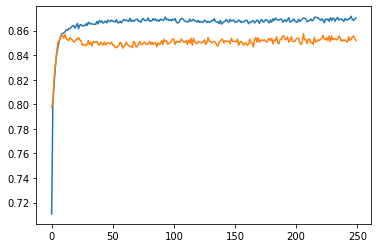

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

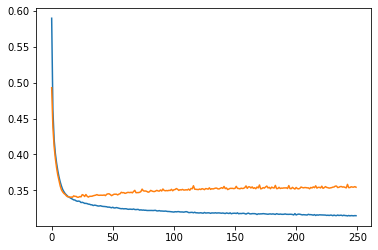

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])